

## Historical sales data for 45 stores of a Retail chain located in different regions is provided. Each store contains a number of departments. The task is to find the best fitting model to predict the department-wide sales for each store.

https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data

#### The data is provided in 4 different CSVs 

features.csv.zip, 
stores.csv, 
test.csv.zip, 
train.csv.zip, 
sampleSubmission.csv.zip

#### The process adopted in this notebook will involve EDA, Pre-processing and Modelling, Cross-Validation, Hyper parameter tuning and making final predictions 

In [1]:
# importing basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import datetime # manipulating date formats

# Vizualization
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
%matplotlib inline

# settings
import warnings
warnings.filterwarnings("ignore")

#### Importing datas using Pandas

In [ ]:
# reading data
features=pd.read_csv("/content/drive/MyDrive/DATA602/Data_602_project/Dataset/features.csv.zip")
stores=pd.read_csv("/content/drive/MyDrive/DATA602/Data_602_project/Dataset/stores.csv")
train=pd.read_csv("/content/drive/MyDrive/DATA602/Data_602_project/Dataset/train.csv")
test=pd.read_csv("/content/drive/MyDrive/DATA602/Data_602_project/Dataset/test.csv.zip")

#### Getting some descriptive statistics/summary of the datas using Pandas

In [ ]:
df_names=['features','stores','train','test']
df_list=[features,stores,train,test]
for i in range(4):
    print('--'*15)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*15)
    display(df_list[i].head(5))

------------------------------
Dataframe features has 8190 rows and 12 columns.
------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


------------------------------
Dataframe stores has 45 rows and 3 columns.
------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


------------------------------
Dataframe train has 421570 rows and 5 columns.
------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


------------------------------
Dataframe test has 115064 rows and 4 columns.
------------------------------


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


#### Checking the duration of the data record for the model preparation

In [ ]:
# checking time duration of records
for i in [0,2,3]:
    print(f'Dataframe {df_names[i]} contains data from {df_list[i].Date.min()} to {df_list[i].Date.max()}.\n')

Dataframe features contains data from 2010-02-05 to 2013-07-26.

Dataframe train contains data from 2010-02-05 to 2012-10-26.

Dataframe test contains data from 2012-11-02 to 2013-07-26.



## checking for duplicates and nulls.

In [ ]:
# checking missing values
for i in range(4):
    print(f'Dataframe {df_names[i]} has missing values.\n') if (df_list[i].isna().sum().any()==True) else print(f'Dataframe {df_names[i]} does not have missing values.')

Dataframe features has missing values.

Dataframe stores does not have missing values.
Dataframe train does not have missing values.
Dataframe test does not have missing values.


## Finding percentage of missing data in the feature data 

In [ ]:
print('Percentages of missing values in features dataframe.')
(100*features.isna().sum()/features.shape[0]).sort_values()

Percentages of missing values in features dataframe.


Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
IsHoliday        0.000000
CPI              7.142857
Unemployment     7.142857
MarkDown5       50.549451
MarkDown1       50.769231
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown2       64.334554
dtype: float64

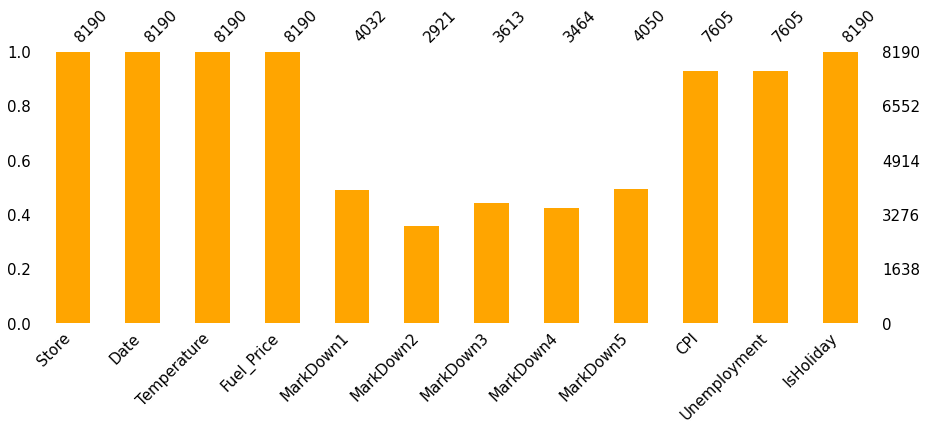

In [ ]:
import missingno as msno
msno.bar(features,figsize=(15, 5),fontsize=15, color='orange');

#### All the markdown columns have more than 50% missing values.  So, it's quite difficult to choose best imputation technique. If correlation of these columns is not strong with target variable, I will drop them. Let's do EDA first.

# EDA


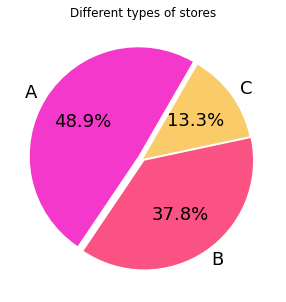

In [ ]:
# pie chart
labels = stores.Type.value_counts().index.tolist()
sizes = stores.Type.value_counts().values.tolist()
explode = (0.05, 0.02, 0)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=60,
        textprops={'fontsize': 18},colors=['#f538cc','#fa5282','#facc69'])
plt.title('Different types of stores');

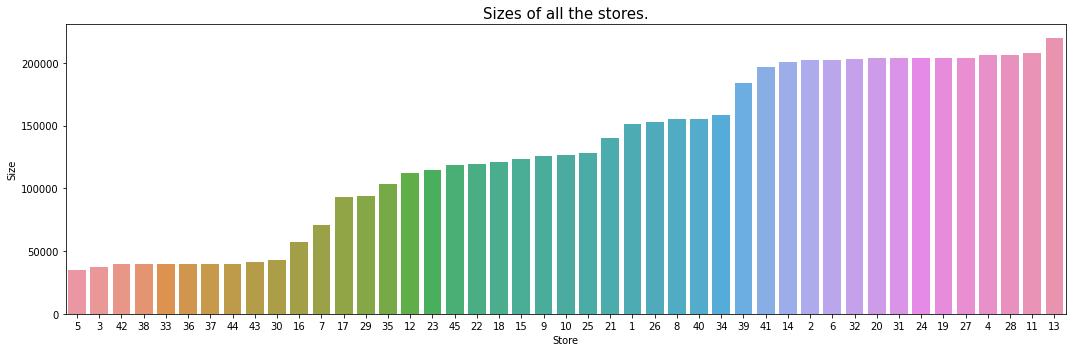

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout();

#### There are broadly 3 types of stores: small-sized, medium-sized and large-sized. This numerical variable can be converted into categorical variable using pd.cut function but first let's check relation between size and type of the stores.

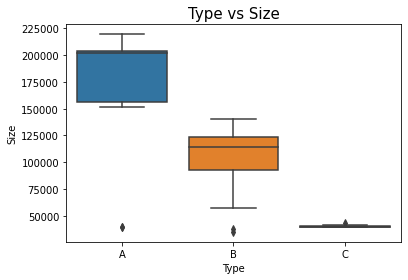

In [ ]:
#sns.set_style('whitegrid')
sns.boxplot(x='Type',y='Size',data=stores)
plt.title('Type vs Size',fontsize=15);

#### Though we don't have any knowledge about how stores were divided into these types, we can see from the graph that it covers the effect of size column.

### Now, let us combine the data files for further exploration

In [ ]:
# combining train/test and stores and features dataframes for further analysis

train_expanded = train.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
train_expanded = train_expanded.merge(stores, how='inner', on=['Store'])

test_expanded = test.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
test_expanded = test_expanded.merge(stores, how='inner', on=['Store'])

# converting dtype of date column
train_expanded['Date'] = pd.to_datetime(train_expanded['Date'])
test_expanded['Date'] = pd.to_datetime(test_expanded['Date'])

# Checking the combined data for train_expanded
train_expanded.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


### Plotting train_expanded data with sales 

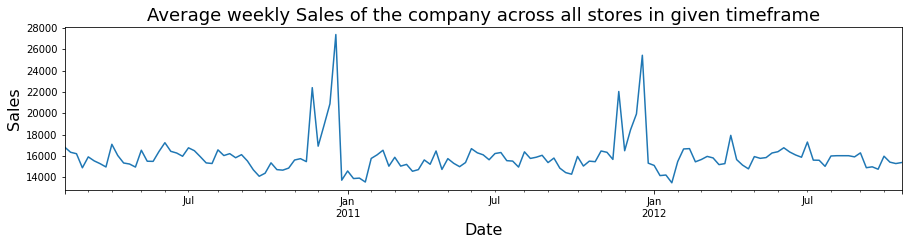

In [ ]:
plt.figure(figsize=(15,3))
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

## Plot to find yearly trend for:

### Weekly sales of the company

#### 1. On different years
#### 2. On the type [A,B,C] of stores

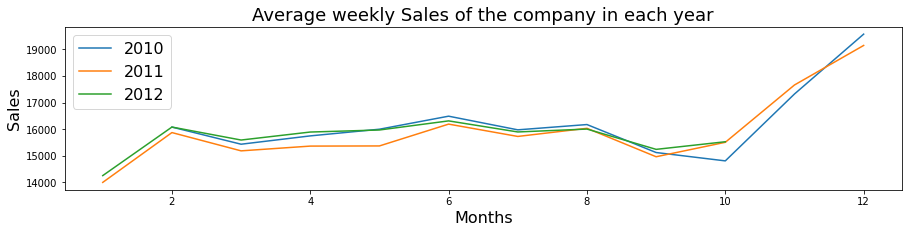

In [ ]:
## 1

# creating 3 new features from date column

for df in [train_expanded,test_expanded]:
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15,3))
train_expanded[train_expanded['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company in each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

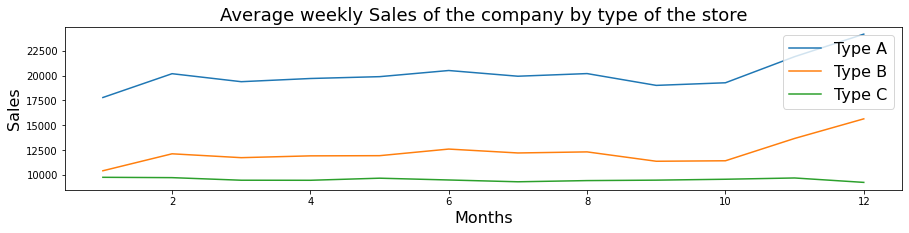

In [ ]:
## 2

plt.figure(figsize=(15,3))
train_expanded[train_expanded['Type']=='A'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='B'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='C'].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company by type of the store', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

Sales of the company see rise during the end of the year. Possible reasons could be any tradition or festival in that company.

Type A stores seem to have comparitively high sales. But this can be due to difference in number of stores of different type. Also, we can notice that sales of type C are constant over the year.

### Dropping NaNs and finding most correlating features for the dataframe  with Weekly_Sales

In [ ]:
corr=train_expanded.dropna().corr()
corr.style.background_gradient(cmap='magma')

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
Store,1.000000,0.008392,-0.053834,-0.005363,-0.153155,0.136718,0.006861,-0.019274,-0.018068,0.002050,0.060453,-0.213719,0.221854,0.088596,-0.016111,-0.017971,0.007465
Dept,0.008392,1.000000,0.137125,0.002026,-0.001662,-0.000743,0.004395,0.001124,0.003469,0.004650,0.004794,-0.006935,0.002805,0.018307,0.002461,0.002568,-0.001466
Weekly_Sales,-0.053834,0.137125,1.000000,0.014389,0.013029,-0.020557,0.037341,0.015829,0.062792,0.029471,0.059649,-0.016371,-0.037735,0.212192,0.050354,0.050833,-0.057498
IsHoliday,-0.005363,0.002026,0.014389,1.000000,-0.153325,-0.136284,-0.062978,0.345704,0.423164,-0.017209,-0.076273,-0.001871,0.022496,-0.024260,0.201712,0.197182,-0.266867
Temperature,-0.153155,-0.001662,0.013029,-0.153325,1.000000,0.250824,0.019313,-0.332382,-0.088348,-0.057895,0.024329,0.201037,-0.009300,0.078196,0.172996,0.171349,0.390732
Fuel_Price,0.136718,-0.000743,-0.020557,-0.136284,0.250824,1.000000,0.084308,-0.243836,-0.093533,-0.025784,-0.137564,-0.365318,0.276568,0.005225,-0.139966,-0.153685,0.402771
MarkDown1,0.006861,0.004395,0.037341,-0.062978,0.019313,0.084308,1.000000,-0.001615,-0.130754,0.828928,0.107125,-0.046005,0.064428,0.184665,-0.199688,-0.176743,0.185957
MarkDown2,-0.019274,0.001124,0.015829,0.345704,-0.332382,-0.243836,-0.001615,1.000000,-0.051240,-0.017517,-0.023390,-0.036992,0.018334,0.081513,-0.005782,-0.012428,-0.226489
MarkDown3,-0.018068,0.003469,0.062792,0.423164,-0.088348,-0.093533,-0.130754,-0.051240,1.000000,-0.080216,-0.043373,-0.025030,0.013967,0.035212,0.219200,0.212150,-0.327598
MarkDown4,0.002050,0.004650,0.029471,-0.017209,-0.057895,-0.025784,0.828928,-0.017517,-0.080216,1.000000,0.101114,-0.041662,0.018817,0.133569,-0.231927,-0.208573,0.166603


#### It seems the features 'Dept'and 'Size' have 13% and 21% correlation with Weekly_sales. The contribution of other features are comparatively low

### Let us confirm our finding with bar plot 

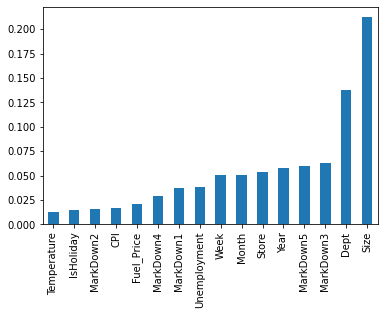

In [ ]:
train_expanded.dropna().corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

#### The bar plot confirms our findings, but the distribution of target variable is highly skewed. That's why, I will not go with linear regression.

#  Pre-processing and modelling

In [ ]:
# importing relevant libraries

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## As per the EDA observation

### The following features are level encoded:
##### IsHoliday, Type. 



### The following features are dropped: 
##### Year, CPI, unemployment, temperature, fuel price,  All the 'markdown' columns.

In [ ]:
# preprocessing

def preprocessor(df):
    # label-encoding
    df['IsHoliday'] = df['IsHoliday'].astype('str').map({'True':0,'False':1})
    df.Type = df.Type.map({'A':2,'B':1,'C':0})
    # deleting less important features
    return df.drop(['Date','Year','MarkDown1','MarkDown2','MarkDown4','MarkDown3','MarkDown5','CPI',
             'Unemployment','Temperature','Fuel_Price'],axis=1)

train_preprocessed = preprocessor(train_expanded)
test_preprocessed = preprocessor(test_expanded)

In [ ]:
# splitting data into 2 parts

y = train_preprocessed["Weekly_Sales"]
X = train_preprocessed.drop(['Weekly_Sales'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

# function for displaying scores

def score_calc(predictions):
    scores = pd.DataFrame([mean_absolute_error(y_test, predictions)
    #                      ,mean_squared_error(y_test, predictions)
                          ,r2_score(y_test, predictions)],columns=['score'],index=['MAE','R2 score'])
    return scores

# function for building model

def run_model(model,name):
    
    name = model()
    name.fit(X_train, y_train)
    preds = name.predict(X_test)
    try:
        feat_imp = name.feature_importances_
        plt.bar(X_train.columns,feat_imp,color='green')
        plt.title('Feature Importance graph')
        plt.xticks(rotation=45)
    except:
        pass
    return score_calc(preds)

In [ ]:
train_preprocessed.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week,Month
0,1,1,24924.50,1,2,151315,5,2
1,1,1,46039.49,0,2,151315,6,2
2,1,1,41595.55,1,2,151315,7,2
3,1,1,19403.54,1,2,151315,8,2
4,1,1,21827.90,1,2,151315,9,3


## Model testing

#### 1. Using all features
#### 2. Using best contributing features

## 1 
Using all features

,score
MAE,1976.518275
R2 score,0.952769


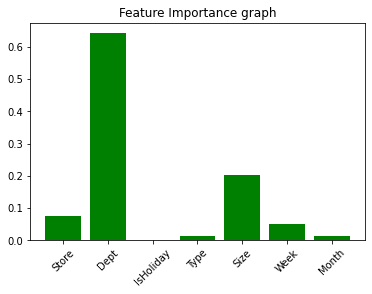

In [ ]:
run_model(DecisionTreeRegressor,'dtree')

,score
MAE,1761.560825
R2 score,0.968642


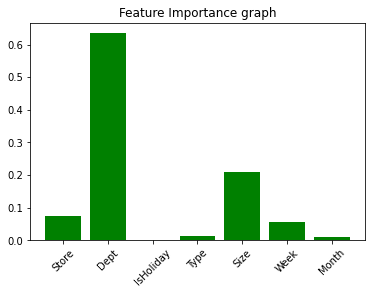

In [ ]:
run_model(RandomForestRegressor,'rfc')

[19:52:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,score
MAE,7040.429843
R2 score,0.734944


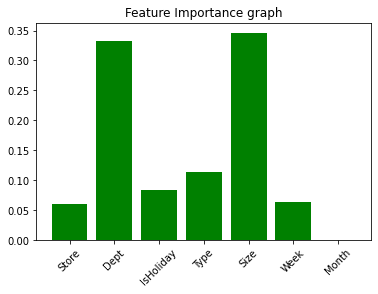

In [ ]:
run_model(XGBRegressor,'xgb')

In [ ]:
run_model(KNeighborsRegressor,'knn')

,score
MAE,5836.120170
R2 score,0.758062


## 2 
Using Store, Department and Size columns

In [ ]:
X_train = X_train[['Store','Dept','Size']]
X_test = X_test[['Store','Dept','Size']]

,score
MAE,2661.644154
R2 score,0.905231


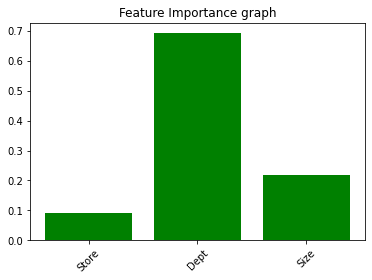

In [ ]:
run_model(DecisionTreeRegressor,'dtree')

,score
MAE,2661.950943
R2 score,0.905229


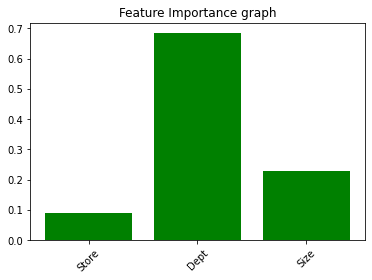

In [ ]:
run_model(RandomForestRegressor,'rfc')

[19:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,score
MAE,6746.267440
R2 score,0.741611


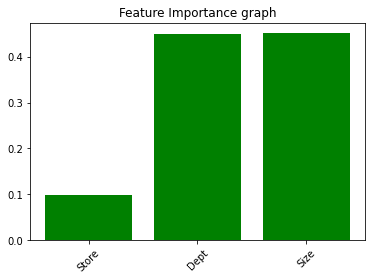

In [ ]:
run_model(XGBRegressor,'xgb')

In [ ]:
run_model(KNeighborsRegressor,'knn')

,score
MAE,2975.276170
R2 score,0.888146


## Comparing result from different models to choose the best fitting model

<!-- TABLE_GENERATE_START -->

|                   |          | dtree   |  rfc    |  xgb    |  knn    |
| ----------------- | ---------|---------|---------|---------|---------|
| All features      | MAE      |1977.3930|1763.3921|7040.4298|5836.1201|
|                   | R2 score |0.9528   |0.9678   |0.7349   |0.7580   |
|Selective features | MAE      |2661.6495|2662.1889|6746.2674|2975.2761|
|                   | R2 score |0.9052   |0.9051   |0.7416   |0.8881   |
<!-- TABLE_GENERATE_END -->

#### RandomForestRegressor using all features gives the best result. So cross-validation and Hyper parameter tuning is done on this model to get the final prediction

## Cross-validation 

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestRegressor(), X, y, cv=4)
print(f"Average 4-Fold CV Score: {score.mean().round(4)}")

Average 4-Fold CV Score: 0.6925


## Hyper parameter tuning

In [ ]:
random_grid = {'n_estimators': [50,60,70],
               'max_features': [3,4],
               'max_depth': [25,30,35],
               'min_samples_split': [3,4],
              'min_samples_leaf':[1,2]}

rf_grid = RandomizedSearchCV(RandomForestRegressor(),
                        random_grid,
                        cv = 4,
                        n_jobs = 5,
                        verbose=True)

rf_grid.fit(X,y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
0.7838428391119417
{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 30}


In [ ]:
## cross-validation using kfold

predictor_train_scale = train_preprocessed.drop('Weekly_Sales',axis=1)
predictor_test_scale = test_preprocessed
target_train = train_preprocessed.Weekly_Sales

kf=KFold(n_splits=4,shuffle=True)

preds_3   = list()
y_pred_3  = []
r2_score_ = []
mae=[]

# Applying model on each fold and calculating mean of score
for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train_scale)):    
    
    X_train, y_train = predictor_train_scale.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train_scale.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    r2 = r2_score(y_val,rf.predict(X_val))
    mae_ = mean_absolute_error(y_val,rf.predict(X_val))
    r2_score_.append(r2)
    mae.append(mae_)
    preds_3.append(rf.predict(predictor_test_scale[predictor_test_scale.columns]))
    
y_pred_final_3 = np.mean(preds_3,axis=0)    

print('R2 - CV Score: {}'.format((sum(r2_score_)/4)),'\n')
print('MAE Score: {}'.format((sum(mae)/4)),'\n')
print("Score : ",r2_score_)


Fold: 1


Fold: 2


Fold: 3


Fold: 4

R2 - CV Score: 0.9677850788123067 

MAE Score: 1777.326659863002 

Score :  [0.9692681810590611, 0.9680947893727772, 0.9650331031063716, 0.968744241711017]


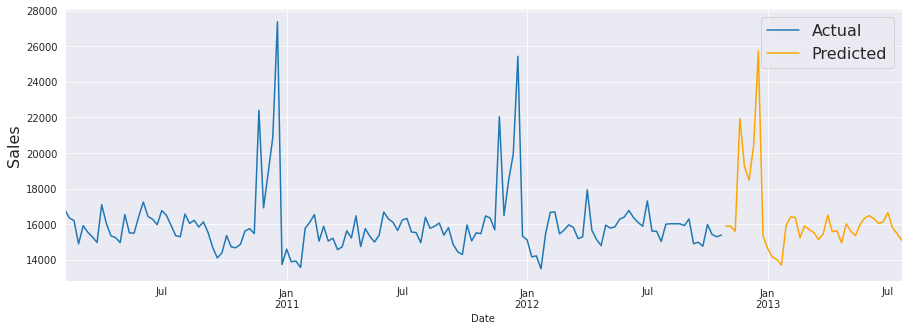

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
test_expanded['Weekly_Sales'] = y_pred_final_3
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
test_expanded.groupby('Date')['Weekly_Sales'].mean().plot(color='orange')
plt.legend(['Actual', 'Predicted'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16);

## Making final predictions

In [ ]:
Sales_prediction = pd.read_csv('/content/drive/MyDrive/DATA602/Data_602_project/Dataset/sampleSubmission.csv.zip')
Sales_prediction['Weekly_Sales'] = y_pred_final_3
#Sales_prediction.to_csv('sales_prediction.csv',index=False)
Sales_prediction


,Id,Weekly_Sales
0,1_1_2012-11-02,35851.716506
1,1_1_2012-11-09,19323.977968
2,1_1_2012-11-16,19389.755072
3,1_1_2012-11-23,19953.408587
4,1_1_2012-11-30,21831.917408
...,...,...
115059,45_98_2013-06-28,699.177092
115060,45_98_2013-07-05,789.819661
115061,45_98_2013-07-12,610.692758
115062,45_98_2013-07-19,574.949607
